** TP SVM non-linéaire **

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets

def mesh(X, h = 0.02):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return np.c_[xx.ravel(), yy.ravel()], xx, yy



**Création des données non-linéaire de type cercle**

In [11]:
np.random.seed(0)
n_samples = 1000
X, y = datasets.make_circles(n_samples=n_samples, factor=.75, noise=.1)
xtest_grid, x_grid, y_grid  = mesh(X)

**Creation d'un SVM non-lineaire sous sklearn**

Choississez un noyau de type rbf ou polynomial avec des paramètres appropriés

In [ ]:
# paramètre C 
C = 1000
# type de noyau et son paramètres
kernel =
gamma = 
degree = 

# definition et apprentissage du noyau
clf = SVC(C=C, kernel= kernel , degree=2, gamma = gamma)
clf.fit(X, Y)


1. Vérifier que les vecteurs support ont une prédiction de +1 ou -1

In [ ]:
# Verification des  points supports
# extraction des paramètres du modèles
indice_SV = clf.support_
alpha = clf.dual_coef_[0]
b = clf.intercept_

from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel

# insérer votre code ici
K = 
y_pred =


2 - Faire une représentation des donnéés avec les courbes de niveau des fonctions de décisions à 0,1 et -1.

3 - Proposer plusieurs graphes avec différentes valeurs des paramètres de noyaux. proposer une analyse de l'effet de ces paramètres sur la compléxité de la fonction de décision

/home/alain/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


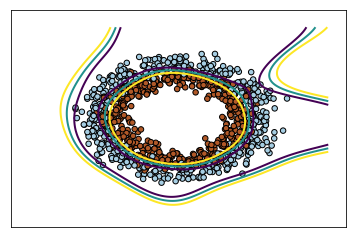

In [13]:
#%

C = 1000
# type de noyau et son paramètres
kernel = 'rbf'
gamma =  1
degree = 0

# definition et apprentissage du noyau
clf = SVC(C=C, kernel= kernel , degree=2, gamma = gamma)
clf.fit(X, y)


Z = clf.decision_function(xtest_grid)
Z = Z.reshape(x_grid.shape)

contours = plt.contour(x_grid, y_grid, Z, levels=[-1,0,1], linewidths=2,
                       linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-2, 2, -2, 2])
plt.show()

**Sélection de modèle par validation croisée**

In [ ]:
from sklearn.model_selection import StratifiedKFold


n_samples = 1000
X_app, y_app = datasets.make_circles(n_samples=n_samples, factor=.6, noise=.1)
X_test, y_test = datasets.make_circles(n_samples=n_samples, factor=.6, noise=.1)

    
nb_iter = 5
gamma_vec =np.logspace(-4,1,6);
C_vec = np.logspace(-4,3,5)
perf_val = np.zeros((len(C_vec), len(gamma_vec),nb_iter))

kf = StratifiedKFold(n_splits= nb_iter)
for i, (ind_a, ind_v) in enumerate(kf.split(X_app,y_app)):
    X_a,X_v = X_app[ind_a], X_app[ind_v]
    y_a, y_v = y_app[ind_a], y_app[ind_v]

    for i_C, C in enumerate(C_vec):
        for i_g, gamma in enumerate(gamma_vec):
            # INSERT YOUR CODE
            
            
            perf_val[i_C,i_g,i] = np.mean(y_pred_v==y_v)


m_perf = perf_val.mean(axis = 2)
ind_max = np.unravel_index(np.argmax(m_perf), m_perf.shape)
C_opt = C_vec[ind_max[0]] 
gamma_opt = gamma_vec[ind_max[1]] 

clf = # INSERT YOUR CODE
clf.fit(X_app, y_app)
y_pred = # INSERT YOUR CODE
print(np.mean(y_pred == y_test))
M_perf = np.mean(y_pred == y_test)
